# Individual Planning Report
Each student is expected to prepare a **1 page (max 500 words, where code does not count toward the word count)** written proposal that describes the data they are working on, demonstrates an understanding of all variables and potential issues in the data, and identifies both the broad question they would like to address and the specific question they have formulated.

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

In [87]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("cleanup.R")
library(ggplot2)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [63]:
players_file <- read_csv("data/players.csv")
#players_file
player_file1 <- players_file |>
                    select (-hashedEmail, -name)
player_file1

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,0.0,Prefer not to say,17
Amateur,FALSE,2.3,Male,17
Pro,TRUE,0.2,Other,NA


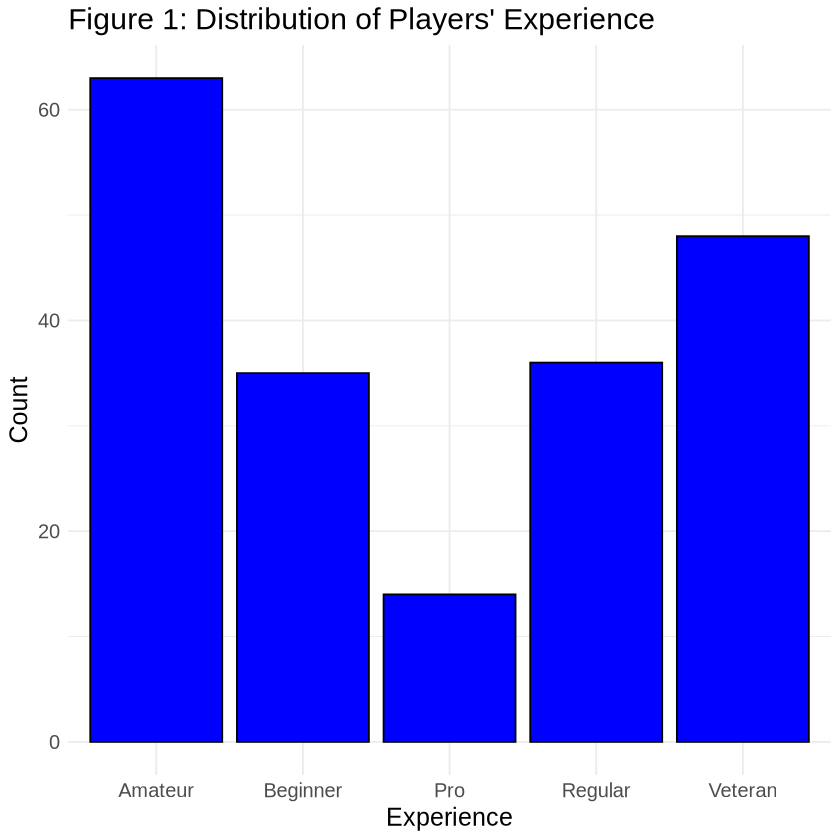

In [91]:
player_exp <- players_file |> 
                group_by (experience) |>
                summarize(count = n()) |>
                select(experience, count)
#player_exp

bar_player_exp <- ggplot(players_file, aes(x = experience)) +
  geom_bar(fill = "blue", color = "black") +  
  labs(title = "Figure 1: Distribution of Players' Experience", x = "Experience", y = "Count") +
  theme_minimal() +
  theme (text = element_text(size = 15))

bar_player_exp

gender,count,max_count
<chr>,<int>,<int>
Male,124,124


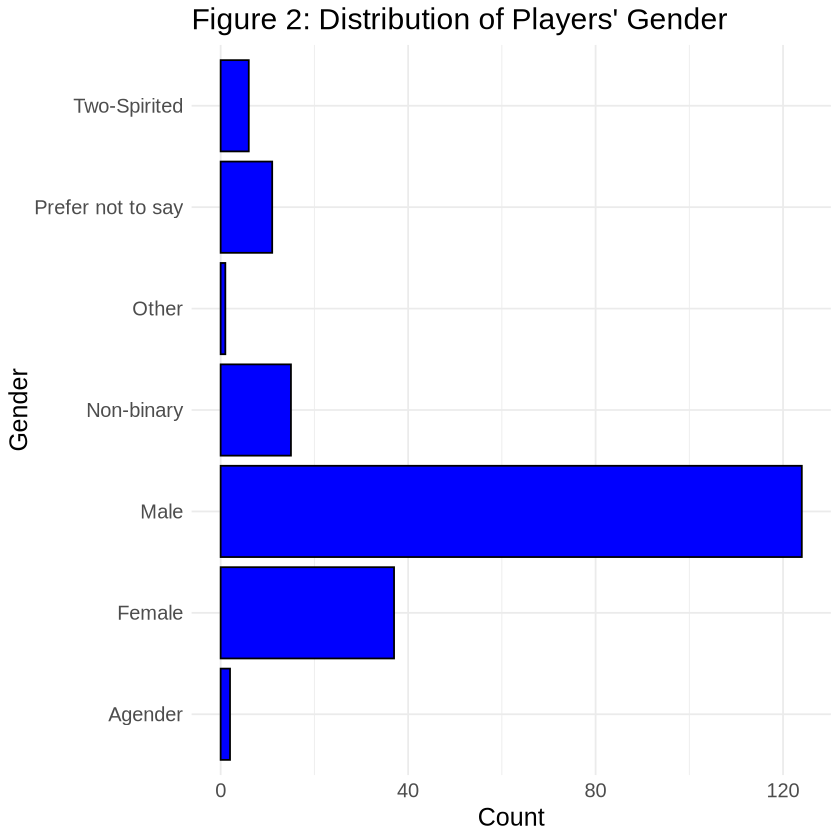

In [92]:
player_gender <- players_file |> 
                group_by (gender) |>
                summarize(count = n()) |>
                select(gender, count)
#player_gender

max_gender_group <- player_gender |> 
                 filter(count == max(count)) |> 
                 mutate(max_count = count)
max_gender_group

bar_player_gender <- ggplot(players_file, aes(y = gender)) +
  geom_bar(fill = "blue", color = "black") +  
  labs(title = "Figure 2: Distribution of Players' Gender", x = "Count" , y = "Gender") +
  theme_minimal() +
  theme (text = element_text(size = 15))

bar_player_gender 

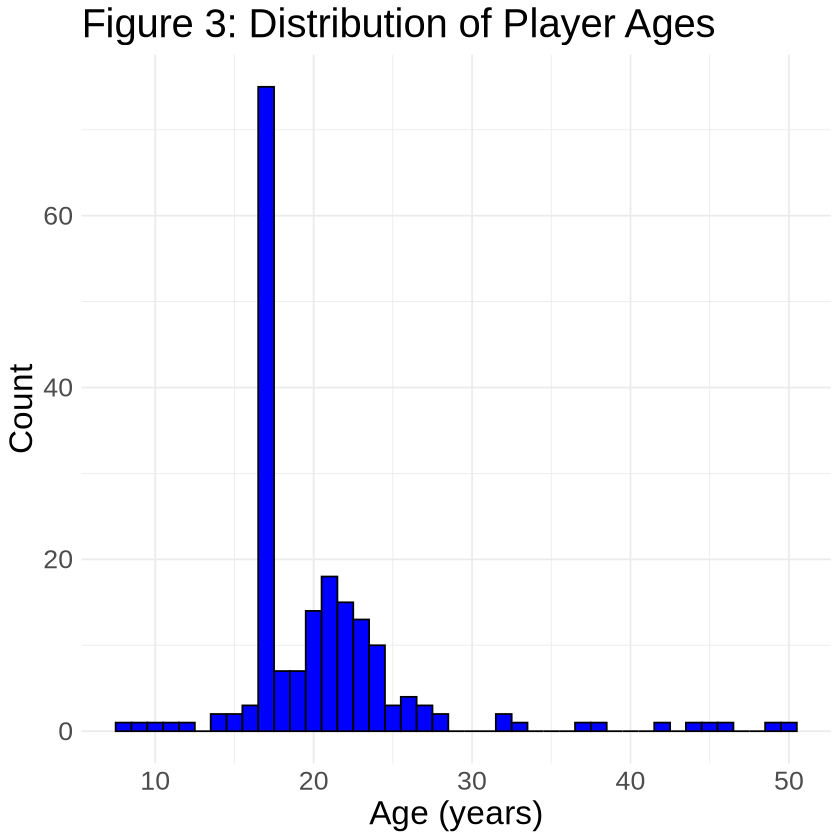

In [94]:
player_age <- players_file |> 
                group_by (Age) |>
                summarize(count = n()) |>
                select(Age, count)
#player_age
hist_player_age <- ggplot(players_file, aes(x = Age)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", na.rm = TRUE) +
  labs(title = "Figure 3: Distribution of Player Ages", x = "Age (years)", y = "Count") +
  theme_minimal() +
  theme (text = element_text(size = 20))
hist_player_age
max_age_group <- player_age |> 
                 filter(count == max(count)) |> 
                 mutate(max_count = count)
#max_age_group

In [34]:
session_file <- read_csv("data/sessions.csv", show_col_types = FALSE)
session_file_1 <- session_file |>
                    group_by (hashedEmail) |>
                    summarize(count = n())


hashedEmail,count
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1


- Figure 2: The male player group consists of 124 out of 196 players, making up nearly 63% of the entire player population, forming a clear majority.
- Figure 3: The majority of players are between 13 and 28 years old. The 17-year-old group has 75 players out of 196, nearly four times as many as the second-largest group. This age group alone accounts for almost 40% of the total player population.

## Individual Planning Report

Provide a full descriptive summary of the dataset, including  information such as 
1) the number of observations
2) summary statistics,
3) number of variables,
4) name and type of variables,
5) what the variables mean,
6) any issues you see in the data,
7) any other potential issues related to things you cannot directly see,
8) how the data were collected, etc.

<br>**Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.**
<br>Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. **You need to summarize the full data regardless of which variables you may choose to use later on.**


## Questions

Clearly state
1) one broad question that you will address, and
2) the specific question that you have formulated.

Your question should involve **one response variable** of interest and **one or more explanatory variables**, and **should be stated as a question**. 
<br>One common question format is: “Can explanatory variable(s) predict response variable in dataset?”, but you are free to format your question as you choose so long as it is clear. 
<br>**Describe clearly how the data will help you address the question of interest.** You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

## Exploratory Data Analysis and Visualization
- Demonstrate that the dataset can be loaded into R.
- Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
- Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
- Make a few exploratory visualizations of the data to help you understand it.
    - Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
    - Explain any insights you gain from these plots that are relevant to address your question

<br> Note: **DO NOT perform any predictive analysis** here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

## Methods and Plan
- Propose one method to address your question of interest using the selected dataset
- explain why it was chosen.
<br>**DO NOT perform any modelling or present results** at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

- Why is this method appropriate?
- Which assumptions are required, if any, to apply the method selected?
- What are the potential limitations or weaknesses of the method selected?
- How are you going to compare and select the model?
- How are you going to process the data to apply the model?
    - For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?